#   1. Introdução 

A análise abaixo foi feita através de uma base disponibilizada por uma empresa local, visando a integridade da empresa, nomes
e valores foram mascarados. O intuito da análise a seguir é explorar os dados afim de entender os eventos correntes para então agir de acordo com a melhor ação visando a melhoria do processo.

CD Sol Nascente: Um centro de distribuição que recebe e faz expedição de peças. Sabesse que há um volume de peças danificadas mas não há uma visão organizada do processo e que chegue a alguma conclusão.

Perguntas de interesse a serem respondidas:

- Existe uma dispariedade de peças danificadas entre uma categoria e outra?
- Qual é o comportamento das trasportadoras em relação a quantidade de peças defeitusas registradas?
- Há outliers registrados? Se sim, qual poderá ser sua possível causa?
<b>
<b>
    
    
    
<b><i>Estrutura: O fluxo de análise deste dataset será: Analisar Dataset(Estrutura) -> Realizar análise Univariada -> Realizar análise Bivariada e Multivariada</i></b>

# 2 . Importando Bibliotecas


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.style.use('ggplot')

# 3. Carregando Dataset

In [3]:
cd = pd.read_csv('CD Sol Nascente.csv', sep = ";")

In [4]:
#Analisando visualmente o dataset já da para notar a coluna de Data sem a formatação usual "dd/mm/aa" em PT-B e colunas
#sem informações NaN.

cd.head(5)

,Data,MÊS,Código,Produto,Peças Recebidas com Defeito,Lote,Fábrica Origem,Transportadora,Valor unitario,Valor total,Categoria,Unnamed: 11,Unnamed: 12
0,43832,JAN,39682,Produto K,104,BT354,Fábrica Sudeste,Novo Horizonte,10,1040,HIDRO,NaN,NaN
1,43832,JAN,70428,Produto O,289,BT361,Fábrica Sudeste,Gavião,"7,68","2219,52",CREMES,NaN,NaN
2,43832,JAN,71644,Produto J,267,BT340,Fábrica Nordeste,Novo Horizonte,"9,49","2533,83",HIDRO,NaN,NaN
3,43832,JAN,44452,Produto V,63,T081,Fábrica Sudeste,Novo Horizonte,"23,36","1471,68",TERCEIROS,NaN,NaN
4,43832,JAN,71594,Produto C,443,S024,Fábrica Nordeste,Flash,"8,45","3743,35",HIDRO,NaN,NaN


In [5]:
#Verifcando os tipos de dados presentes no dataset já é possível observar que as colunas que contem valores são do tipo object
#quando o ideal é que sejam to tipo float para uma melhor precisão nas operações com as respectivas informações.

cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         2084 non-null   int64  
 1   MÊS                          2084 non-null   object 
 2   Código                       2084 non-null   int64  
 3   Produto                      2084 non-null   object 
 4   Peças Recebidas com Defeito  2084 non-null   int64  
 5   Lote                         2084 non-null   object 
 6   Fábrica Origem               2084 non-null   object 
 7   Transportadora               2084 non-null   object 
 8   Valor unitario               2084 non-null   object 
 9   Valor total                  2084 non-null   object 
 10  Categoria                    2084 non-null   object 
 11  Unnamed: 11                  0 non-null      float64
 12  Unnamed: 12                  0 non-null      float64
dtypes: float64(2), int

In [6]:
#Verificando dimensões em tamanho do dataset
cd.shape

(2084, 13)

In [21]:
#Para facilitar o uso das colunas do dataset através do nome das mesmas, costumo fazer o seguinte:

cd.columns

Index(['Data', 'MÊS', 'Código', 'Produto', 'Peças Recebidas com Defeito',
       'Lote', 'Fábrica Origem', 'Transportadora', 'Valor unitario',
       'Valor total', 'Categoria', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

# 4. Tratando inicialmente nosso Dataset

In [7]:
#Removendo colunas vazias de uma lista

cd.drop(columns=['Unnamed: 11', 'Unnamed: 12'], inplace = True)
cd.head(5)

,Data,MÊS,Código,Produto,Peças Recebidas com Defeito,Lote,Fábrica Origem,Transportadora,Valor unitario,Valor total,Categoria
0,43832,JAN,39682,Produto K,104,BT354,Fábrica Sudeste,Novo Horizonte,10,1040,HIDRO
1,43832,JAN,70428,Produto O,289,BT361,Fábrica Sudeste,Gavião,"7,68","2219,52",CREMES
2,43832,JAN,71644,Produto J,267,BT340,Fábrica Nordeste,Novo Horizonte,"9,49","2533,83",HIDRO
3,43832,JAN,44452,Produto V,63,T081,Fábrica Sudeste,Novo Horizonte,"23,36","1471,68",TERCEIROS
4,43832,JAN,71594,Produto C,443,S024,Fábrica Nordeste,Flash,"8,45","3743,35",HIDRO


In [8]:
#A data original do df que após carga, ficou no padrão de data serial e do tipo object, logo usando lambda
#executei o tratamento para o tipo datetime

dados_reais = cd['Data']

data_base_excel = datetime(1899, 12, 30)

cd['data_real'] = dados_reais.apply(lambda x: data_base_excel + timedelta(days=x))
cd['data_real'] = pd.to_datetime(cd['data_real'], format='%d/%m/%Y')  
cd.head(5)




,Data,MÊS,Código,Produto,Peças Recebidas com Defeito,Lote,Fábrica Origem,Transportadora,Valor unitario,Valor total,Categoria,data_real
0,43832,JAN,39682,Produto K,104,BT354,Fábrica Sudeste,Novo Horizonte,10,1040,HIDRO,2020-01-02
1,43832,JAN,70428,Produto O,289,BT361,Fábrica Sudeste,Gavião,"7,68","2219,52",CREMES,2020-01-02
2,43832,JAN,71644,Produto J,267,BT340,Fábrica Nordeste,Novo Horizonte,"9,49","2533,83",HIDRO,2020-01-02
3,43832,JAN,44452,Produto V,63,T081,Fábrica Sudeste,Novo Horizonte,"23,36","1471,68",TERCEIROS,2020-01-02
4,43832,JAN,71594,Produto C,443,S024,Fábrica Nordeste,Flash,"8,45","3743,35",HIDRO,2020-01-02


In [9]:
#Renoemando as colunas de Peças Recebidas com Defeito, Fábrica Origem, Valor unitario e Valor total a fim de evitar erros devido
#aos espaços entre as palavras e acentuações

Nome_correto = {
    'Peças Recebidas com Defeito':'Pecas_Defeituosas',
    'Fábrica Origem':'Fabrica_Origem',
    'Valor unitario':'Valor_Unitario',
    'Valor total':'Valor_Total'
}

cd.rename(columns=Nome_correto, inplace=True)

cd.head(5)

,Data,MÊS,Código,Produto,Pecas_Defeituosas,Lote,Fabrica_Origem,Transportadora,Valor_Unitario,Valor_Total,Categoria,data_real
0,43832,JAN,39682,Produto K,104,BT354,Fábrica Sudeste,Novo Horizonte,10,1040,HIDRO,2020-01-02
1,43832,JAN,70428,Produto O,289,BT361,Fábrica Sudeste,Gavião,"7,68","2219,52",CREMES,2020-01-02
2,43832,JAN,71644,Produto J,267,BT340,Fábrica Nordeste,Novo Horizonte,"9,49","2533,83",HIDRO,2020-01-02
3,43832,JAN,44452,Produto V,63,T081,Fábrica Sudeste,Novo Horizonte,"23,36","1471,68",TERCEIROS,2020-01-02
4,43832,JAN,71594,Produto C,443,S024,Fábrica Nordeste,Flash,"8,45","3743,35",HIDRO,2020-01-02


# 5. Análise Univariada

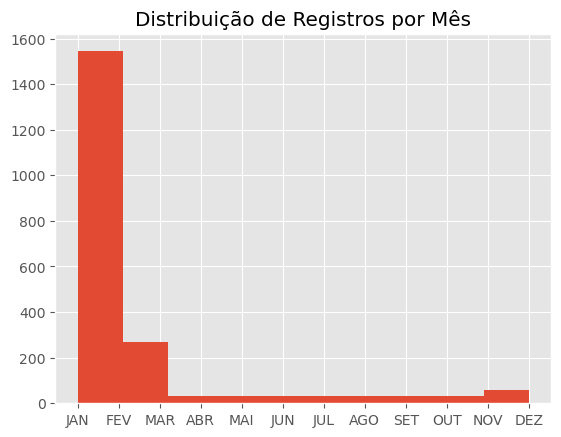

In [10]:
#Analisando a visualização, já é possível identificar uma discrepância de registros entre janeiro e fevereiro comparado aos
#outros meses, no entanto a linha temporal se mostra decrescente 

_= plt.hist(cd.MÊS,bins=10)
_= plt.title("Distribuição de Registros por Mês")

Transportadora
Vai e Vêm         384
Flash             364
Del Monte         351
Novo Horizonte    349
Gavião            318
Rapidex           318
Name: count, dtype: int64

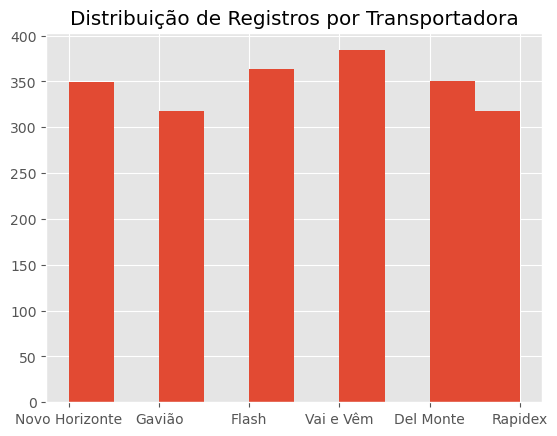

In [11]:
#Agora já começamos observar o comportamento das transportadoras em relação a os registros.
_= plt.hist(cd.Transportadora,bins=10)
_= plt.title("Distribuição de Registros por Transportadora")
cd.Transportadora.value_counts()

Categoria
TERCEIROS    428
HIDRO        423
CREMES       415
MAKE         409
GIFT         409
Name: count, dtype: int64

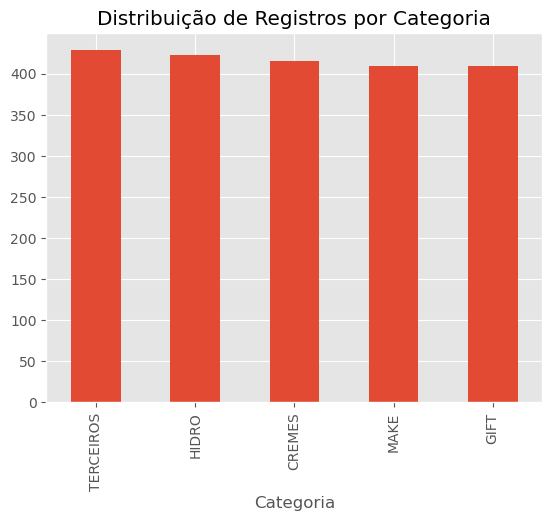

In [54]:
_= cd.Categoria.value_counts().plot.bar()
_= plt.title("Distribuição de Registros por Categoria")
cd.Categoria.value_counts()

Analisando de modo univariado, é possível observar comportamentos que podem levantar hipóteses da influência dos registros
por categoria e transportdora, por exemplo: Será que o método de transporte das peças aplicado pelas transportadoras podem
estar resultando na danificação em excesso? É uma hipótese a se considerar levando em consideração a distribuição simétrica
entre as transportadoras.

In [24]:
#Por fim, interessante tomar conhecimento da média de peças recebidas com algum tipo de problema 
cd['Pecas_Defeituosas'].mean()

247.5278310940499

# 6. Análise Bivariada

Buscando visualizar as informações seguindo uma linha temporal, é possível observar uma hipótese de média aparente de peças recebidas com defeito nos primeiros meses do ano, onde o volume de recebimento já foi observado no gráfico de Distribuição de Registros por Mês.
O cruzamento das variaveis nesta análise também nos permitiu ver a presença de possíveis outliers da categoria Make e Gift. 

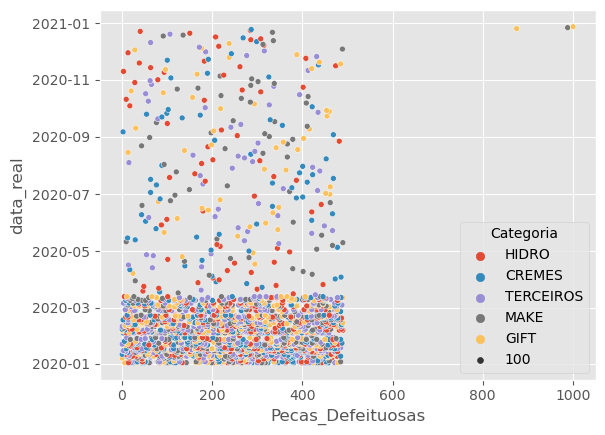

In [12]:
_= sns.scatterplot(x='Pecas_Defeituosas', y='data_real',size =100,hue = 'Categoria', data=cd)

In [13]:
#Verficando informações do possível processo categorizado como outlier 

cd[cd.Pecas_Defeituosas == cd.Pecas_Defeituosas.max()]

,Data,MÊS,Código,Produto,Pecas_Defeituosas,Lote,Fabrica_Origem,Transportadora,Valor_Unitario,Valor_Total,Categoria,data_real
2083,44193,DEZ,74732,Produto R,1000,JDBHS8,Fábrica Nordeste,Del Monte,287,287000,GIFT,2020-12-28


Fabrica_Origem
Fábrica Nordeste    1043
Fábrica Sudeste     1041
Name: count, dtype: int64

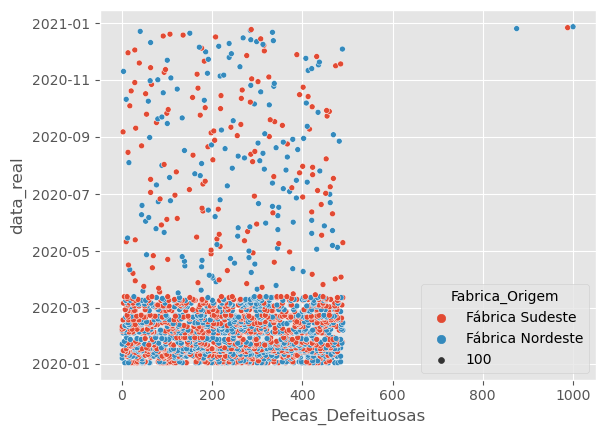

In [19]:
#Utilizando a visualização de scatterplot, vamos usar da análise bivariada para enxergar a distribuição de peças defeituosas
#por unidade de fabricação

_= sns.scatterplot(x='Pecas_Defeituosas', y='data_real',size =100,hue = 'Fabrica_Origem', data=cd)
cd.Fabrica_Origem.value_counts()

A análise confirma uma realção simétrica siginificativa na amostra.

# 7. Conclusão

Após caminhar pelo dataset foi possível responder:

- <b>Existe uma dispariedade de peças danificadas entre uma categoria e outra?</b> Resposta: Não, há uma distribuição semelhante entre as categorias de produtos.
- <b>Qual é o comportamento das trasportadoras em relação a quantidade de peças defeitusas registradas?</b> Resposta: Semelhante a distribuição das categorias,  pouca diferença entre os registros apurados.
- <b>Há outliers registrados? Se sim, qual poderá ser sua possível causa?</b> Resposta: Sim, há outliers presente nos registros e observando o processo todo mostrado na ultima linha de código, e levando em consideração que a média de peças defeituosas é 247.52, minha hipótese é que pode ter ocorrido um lançamento errado que acabou originando esse valor discrepante apresentado.

- <b> De modo geral, os dados mostram uma simetria quase que uniforme, diferenciando em poucos aspectos. O maior ponto negativo neste cenário é a falta de uma conclusão 